In [1]:
!python -V

Python 3.9.12


In [2]:
#!pip install pandas seaborn

In [3]:
import pandas as pd

/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/codespace/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [4]:
import pickle

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [7]:
import sys
sys.path.append("../01-intro")  # adjust path if needed

from nyc_green_taxi_loader import NYCGreenTaxiLoader

loader = NYCGreenTaxiLoader(
        years=(2023, 2024),  # Download data for 2023 and 2024
        start_month=1,       # Starting from January
        end_month=12         # Until December
    )
    
loader.run(max_workers=4)  # Adjust the number of parallel workers based on your system

2025-05-02 11:16:23,418 - INFO - Starting NYC Green Taxi data pipeline at 2025-05-02 11:16:23.418952
2025-05-02 11:16:23,419 - INFO - Processing 24 files
2025-05-02 11:16:23,420 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_01.parquet
2025-05-02 11:16:23,421 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_02.parquet
2025-05-02 11:16:23,421 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_03.parquet
2025-05-02 11:16:23,426 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_04.parquet
2025-05-02 11:16:23,427 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_06.parquet
2025-05-02 11:16:23,428 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_09.parquet
2025-05-02 11:16:23,430 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_10.parquet
2025-05-02 11:16:23,428 - INFO - File already exists: green_taxi_data/raw/green_taxi_2023_07.parquet
2025-05-02 11:16:23,428 - INFO - File 

In [7]:
df = pd.read_parquet('./green_taxi_data/combined_green_taxi_data.parquet')

In [9]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,data_year,data_month
0,2,2023-11-01 00:56:15,2023-11-01 00:59:34,N,1.0,24,238,1.0,0.73,6.5,...,1.80,0.0,None,1.0,10.80,1.0,1.0,0.0,2023,11
1,2,2023-11-01 00:25:06,2023-11-01 00:30:59,N,1.0,74,75,1.0,1.53,9.3,...,2.36,0.0,None,1.0,14.16,1.0,1.0,0.0,2023,11
2,2,2023-11-01 00:40:11,2023-11-01 00:44:08,N,1.0,74,74,1.0,0.70,6.5,...,0.00,0.0,None,1.0,9.00,1.0,1.0,0.0,2023,11
3,2,2023-11-01 00:22:16,2023-11-01 00:33:06,N,1.0,129,82,1.0,1.12,10.7,...,0.00,0.0,None,1.0,13.20,2.0,1.0,0.0,2023,11
4,2,2023-11-01 00:30:48,2023-11-01 00:34:37,N,1.0,82,82,1.0,0.85,6.5,...,0.00,0.0,None,1.0,9.00,2.0,1.0,0.0,2023,11


In [10]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
data_year                         int64
data_month                        int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447278 entries, 0 to 1447277
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1447278 non-null  int64         
 1   lpep_pickup_datetime   1447278 non-null  datetime64[us]
 2   lpep_dropoff_datetime  1447278 non-null  datetime64[us]
 3   store_and_fwd_flag     1367337 non-null  object        
 4   RatecodeID             1367337 non-null  float64       
 5   PULocationID           1447278 non-null  int64         
 6   DOLocationID           1447278 non-null  int64         
 7   passenger_count        1367337 non-null  float64       
 8   trip_distance          1447278 non-null  float64       
 9   fare_amount            1447278 non-null  float64       
 10  extra                  1447278 non-null  float64       
 11  mta_tax                1447278 non-null  float64       
 12  tip_amount             14472

In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,1447278.0,1.873174,1.0,2.0,2.0,2.0,2.0,0.332778
lpep_pickup_datetime,1447278,2023-12-13 07:29:56.139629,2008-12-31 00:00:00,2023-06-10 18:15:48.500000,2023-12-01 12:35:07,2024-06-07 20:02:53.250000,2025-01-01 22:21:15,NaN
lpep_dropoff_datetime,1447278,2023-12-13 07:49:32.723758,2008-12-31 00:00:00,2023-06-10 18:33:23.750000,2023-12-01 12:54:03.500000,2024-06-07 20:24:11.750000,2025-01-01 22:41:59,NaN
RatecodeID,1367337.0,1.189014,1.0,1.0,1.0,1.0,99.0,1.249414
PULocationID,1447278.0,97.441654,1.0,74.0,75.0,116.0,265.0,58.784567
DOLocationID,1447278.0,140.247544,1.0,74.0,138.0,223.0,265.0,76.483755
passenger_count,1367337.0,1.304387,0.0,1.0,1.0,1.0,9.0,0.954166
trip_distance,1447278.0,18.107932,0.0,1.14,1.9,3.38,278990.28,1027.021995
fare_amount,1447278.0,18.342468,-500.0,10.0,14.2,21.2,4003.0,17.973955
extra,1447278.0,0.898743,-7.5,0.0,0.0,1.0,12.7,1.366518


In [13]:
df.describe(include=['object', 'category'])

,store_and_fwd_flag,ehail_fee
count,1367337,0
unique,2,0
top,N,NaN
freq,1362853,NaN


In [14]:
df.isnull().sum().sort_values(ascending=False)

ehail_fee                1447278
trip_type                  80068
store_and_fwd_flag         79941
RatecodeID                 79941
congestion_surcharge       79941
passenger_count            79941
payment_type               79941
VendorID                       0
tolls_amount                   0
data_year                      0
total_amount                   0
improvement_surcharge          0
mta_tax                        0
tip_amount                     0
lpep_pickup_datetime           0
extra                          0
fare_amount                    0
trip_distance                  0
DOLocationID                   0
PULocationID                   0
lpep_dropoff_datetime          0
data_month                     0
dtype: int64

In [ ]:
#1. Initial Data Quality Assessment
print("Initial Data Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False))

# Drop completely empty column
df.drop(columns=['ehail_fee'], inplace=True)

In [22]:
#2. Temporal Data Validation

# Check date ranges more carefully
print("\nDate Ranges:")
print("Pickup min:", df['lpep_pickup_datetime'].min())
print("Pickup max:", df['lpep_pickup_datetime'].max())
print("Dropoff min:", df['lpep_dropoff_datetime'].min())
print("Dropoff max:", df['lpep_dropoff_datetime'].max())

# Filter to reasonable date range (2023-2024)
df = df[(df['lpep_pickup_datetime'].dt.year >= 2023) & 
        (df['lpep_pickup_datetime'].dt.year <= 2024)]

In [23]:
# Step 1: Define financial columns
financial_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                  'tolls_amount', 'improvement_surcharge', 'total_amount',
                  'congestion_surcharge']

print("\nFinancial Columns Summary (Before Cleaning):")
print(df[financial_cols].describe())

# Step 2: Analyze negatives, flag them, and replace with 0
for col in financial_cols:
    neg_mask = df[col] < 0
    neg_count = neg_mask.sum()
    
    if neg_count > 0:
        print(f"\nColumn {col} has {neg_count} negative values:")
        print(df.loc[neg_mask, col].describe())
        
        # Add flag column to indicate refund
        df[f'{col}_was_refund'] = neg_mask
        
        # Replace negative values with 0
        df.loc[neg_mask, col] = 0
    else:
        # If no negatives, still add a column for consistency (all False)
        df[f'{col}_was_refund'] = False


Financial Columns Summary (Before Cleaning):
        fare_amount         extra       mta_tax    tip_amount  tolls_amount  \
count  1.384555e+06  1.384555e+06  1.384555e+06  1.384555e+06  1.384555e+06   
mean   1.755378e+01  9.213461e-01  5.821392e-01  2.443771e+00  2.240063e-01   
std    1.329547e+01  1.374247e+00  3.672691e-01  3.183327e+00  1.281033e+00   
min   -5.000000e+02 -5.000000e+00 -5.000000e-01 -1.788000e+01 -6.940000e+00   
25%    1.000000e+01  0.000000e+00  5.000000e-01  0.000000e+00  0.000000e+00   
50%    1.400000e+01  0.000000e+00  5.000000e-01  2.000000e+00  0.000000e+00   
75%    2.050000e+01  1.000000e+00  5.000000e-01  3.700000e+00  0.000000e+00   
max    1.024300e+03  1.270000e+01  4.250000e+00  4.600000e+02  5.100000e+01   

       improvement_surcharge  total_amount  congestion_surcharge  
count           1.384555e+06  1.384555e+06          1.306979e+06  
mean            9.829102e-01  2.330136e+01          8.023801e-01  
std             1.272772e-01  1.570731e+0


Trip Distance Distribution:
count    1.384555e+06
mean     1.780721e+01
std      1.015318e+03
min      0.000000e+00
25%      1.200000e+00
50%      1.930000e+00
75%      3.380000e+00
max      2.789903e+05
Name: trip_distance, dtype: float64


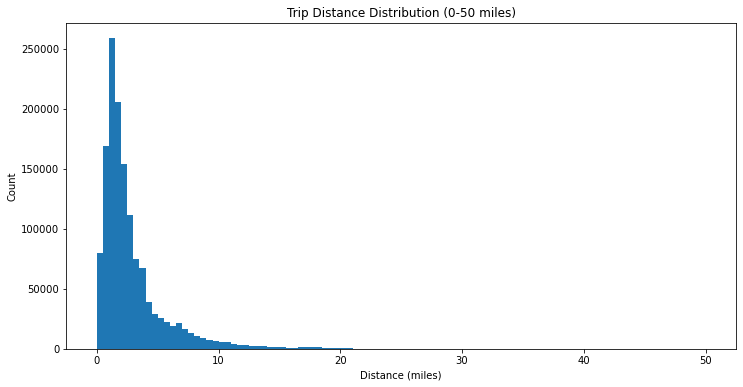


99th percentile of trip distance: 14.8


In [24]:
#4. Trip Distance Analysis (Better Approach)

print("\nTrip Distance Distribution:")
print(df['trip_distance'].describe())

# Visualize distribution
plt.figure(figsize=(12,6))
plt.hist(df['trip_distance'], bins=100, range=(0, 50))
plt.title('Trip Distance Distribution (0-50 miles)')
plt.xlabel('Distance (miles)')
plt.ylabel('Count')
plt.show()

# Instead of hard capping, consider:
# 1. Winsorizing (capping at 99th percentile)
# 2. Natural log transformation
# 3. Separate analysis for short/long trips

# Example: Winsorization
upper_limit = df['trip_distance'].quantile(0.99)
print(f"\n99th percentile of trip distance: {upper_limit}")
df['trip_distance'] = np.where(df['trip_distance'] > upper_limit, upper_limit, df['trip_distance'])

In [ ]:
# 4. Trip Distance Analysis (Better Approach)

print("\nTrip Distance Distribution:")
print(df['trip_distance'].describe())

# Visualize distribution
plt.figure(figsize=(12,6))
plt.hist(df['trip_distance'], bins=100, range=(0, 50))
plt.title('Trip Distance Distribution (0-50 miles)')
plt.xlabel('Distance (miles)')
plt.ylabel('Count')
plt.show()

# Instead of hard capping, consider:
# 1. Winsorizing (capping at 99th percentile)
# 2. Natural log transformation
# 3. Separate analysis for short/long trips

# Example: Winsorization
upper_limit = df['trip_distance'].quantile(0.99)
print(f"\n99th percentile of trip distance: {upper_limit}")
df['trip_distance'] = np.where(df['trip_distance'] > upper_limit, upper_limit, df['trip_distance'])

In [ ]:
# RatecodeID Cleaning (With Explanation)

# Standard RatecodeIDs:
# 1 = Standard rate
# 2 = JFK
# 3 = Newark
# 4 = Nassau or Westchester
# 5 = Negotiated fare
# 6 = Group ride

print("\nOriginal RatecodeID Distribution:")
print(df['RatecodeID'].value_counts(dropna=False))

# Instead of hard-coding, we could:
# 1. Keep valid codes (1-6)
# 2. Create "other" category for invalid codes
# 3. Or treat 99 as negotiated fare (common in some datasets)

valid_ratecodes = [1, 2, 3, 4, 5, 6]
df['RatecodeID'] = np.where(df['RatecodeID'].isin(valid_ratecodes), 
                           df['RatecodeID'], 
                           np.nan)  # or could use 1 for standard rate

print("\nCleaned RatecodeID Distribution:")
print(df['RatecodeID'].value_counts(dropna=False))

In [ ]:
# 6. Temporal Patterns Analysis

# Extract temporal features
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['lpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['lpep_pickup_datetime'].dt.month
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60

# Analyze trip duration
print("\nTrip Duration Analysis:")
print(df['trip_duration'].describe())

# Plot duration distribution
plt.figure(figsize=(12,6))
plt.hist(df['trip_duration'], bins=100, range=(0, 120))
plt.title('Trip Duration Distribution (0-120 minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

In [ ]:
# 7. Location Analysis

print("\nTop 10 Pickup Locations:")
print(df['PULocationID'].value_counts().head(10))

print("\nTop 10 Dropoff Locations:")
print(df['DOLocationID'].value_counts().head(10))

# Analyze common routes
df['route'] = df['PULocationID'].astype(str) + '-' + df['DOLocationID'].astype(str)
print("\nTop 10 Common Routes:")
print(df['route'].value_counts().head(10))

In [ ]:
#8. Passenger Count Analysis
print("\nPassenger Count Distribution:")
print(df['passenger_count'].value_counts(dropna=False))

# Clean passenger counts - don't just cap at 6
# Consider that 0 might mean unknown rather than no passengers
df['passenger_count'] = df['passenger_count'].fillna(0)
df['passenger_count'] = np.where(df['passenger_count'] > 8, 1, df['passenger_count'])

In [ ]:
# 9. Vendor and Payment Analysis

print("\nVendor Distribution:")
print(df['VendorID'].value_counts(dropna=False))

print("\nPayment Type Distribution:")
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
print(df['payment_type'].value_counts(dropna=False))

# Analyze tip behavior by payment type
if 'payment_type' in df.columns:
    print("\nTip Amount by Payment Type:")
    print(df.groupby('payment_type')['tip_amount'].describe())

In [ ]:
# 10. Correlation Analysis

# Select key numerical features
numerical_features = ['trip_distance', 'fare_amount', 'tip_amount', 
                     'tolls_amount', 'trip_duration', 'passenger_count']

# Calculate correlations
corr_matrix = df[numerical_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [15]:
df['lpep_pickup_datetime'].min(), df['lpep_pickup_datetime'].max()

(Timestamp('2008-12-31 00:00:00'), Timestamp('2025-01-01 22:21:15'))

<AxesSubplot:title={'center':'Daily Pickups'}, xlabel='lpep_pickup_datetime'>

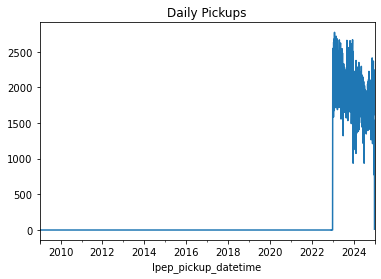

In [16]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df.set_index('lpep_pickup_datetime').resample('D').size().plot(title='Daily Pickups')

In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calculate trip duration in minutes
df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Filter reasonable durations (1-60 minutes)
df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

# Clean trip distance (cap at 99th percentile)
distance_upper = df['trip_distance'].quantile(0.99)
df['trip_distance'] = df['trip_distance'].clip(upper=distance_upper)

# Handle negative fares (set to zero or absolute value)
df['fare_amount'] = df['fare_amount'].abs()

In [27]:
# Temporal features
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['lpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['lpep_pickup_datetime'].dt.month

# Location features
df['PULocationID'] = df['PULocationID'].astype('str')
df['DOLocationID'] = df['DOLocationID'].astype('str')
df['route'] = df['PULocationID'] + '_' + df['DOLocationID']

# Speed feature (miles per hour)
df['speed_mph'] = df['trip_distance'] / (df['duration'] / 60)

# Select features
categorical = ['PULocationID', 'DOLocationID', 'route', 'pickup_hour', 'pickup_dayofweek']
numerical = ['trip_distance', 'passenger_count', 'fare_amount']

In [29]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f} minutes")
print(f"Random Forest MAE: {mae:.2f} minutes")

KeyboardInterrupt: 

In [ ]:
# Feature Importance
plt.figure(figsize=(12, 8))
rf.plot_importance(model, max_num_features=20)
plt.show()

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red')
plt.xlabel('Predicted Duration')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Actual vs Predicted
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 60], [0, 60], 'r--')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Actual vs Predicted Duration')
plt.show()

In [19]:
mean_squared_error(y_train, y_pred)

58.48449321188399

Number of samples: 1384555
y_train range: 1.00 to 60.00
y_pred range: -5.14 to 53.52
NaN in y_train: 0
NaN in y_pred: 0
Inf in y_train: 0
Inf in y_pred: 0


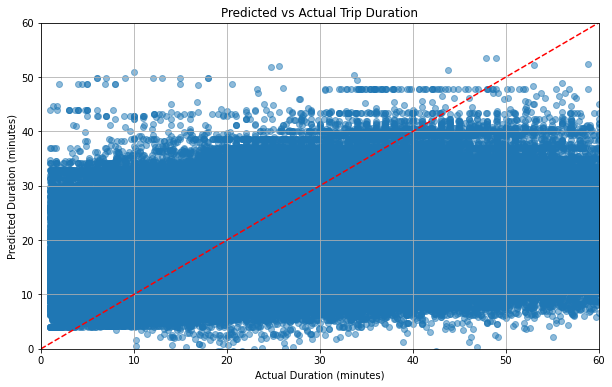

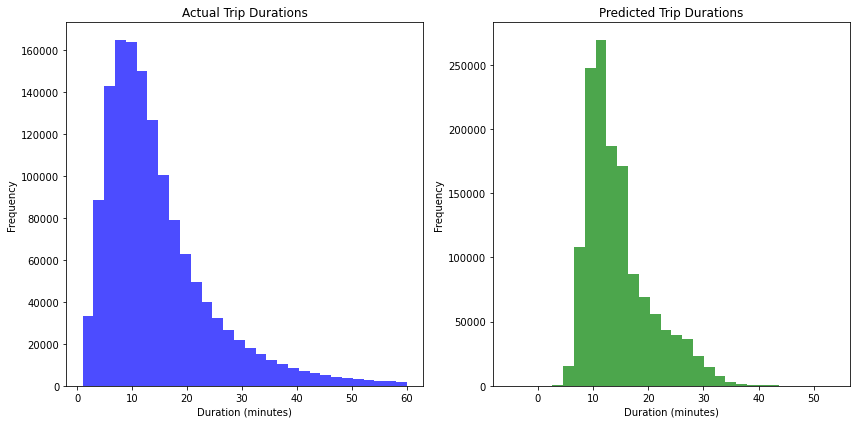

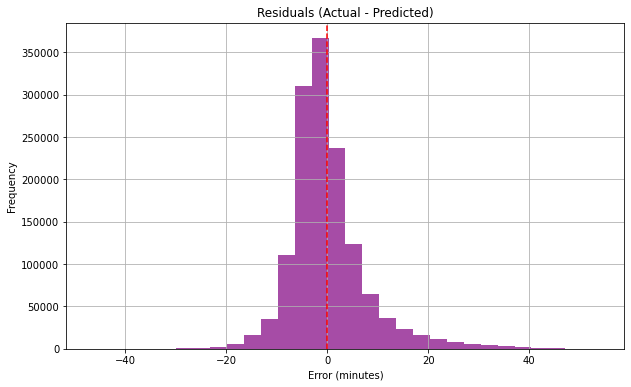

RMSE: 7.6475
MAE: 5.2978
R²: 0.3770


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# First, let's ensure we have valid data to plot
print(f"Number of samples: {len(y_train)}")
print(f"y_train range: {y_train.min():.2f} to {y_train.max():.2f}")
print(f"y_pred range: {y_pred.min():.2f} to {y_pred.max():.2f}")

# Check for any invalid values
print(f"NaN in y_train: {np.isnan(y_train).sum()}")
print(f"NaN in y_pred: {np.isnan(y_pred).sum()}")
print(f"Inf in y_train: {np.isinf(y_train).sum()}")
print(f"Inf in y_pred: {np.isinf(y_pred).sum()}")

# Create a DataFrame for easier manipulation and plotting
results_df = pd.DataFrame({
    'actual': y_train,
    'predicted': y_pred
})

# Basic scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(results_df['actual'], results_df['predicted'], alpha=0.5)
plt.plot([0, 60], [0, 60], 'r--')  # Perfect prediction line
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Predicted vs Actual Trip Duration')
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.grid(True)
plt.show()

# Plot histograms directly with matplotlib (more reliable than seaborn in some environments)
plt.figure(figsize=(12, 6))

# Actual durations histogram
plt.subplot(1, 2, 1)
plt.hist(results_df['actual'], bins=30, alpha=0.7, color='blue')
plt.title('Actual Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Predicted durations histogram
plt.subplot(1, 2, 2)
plt.hist(results_df['predicted'], bins=30, alpha=0.7, color='green')
plt.title('Predicted Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Residuals plot (actual - predicted)
residuals = results_df['actual'] - results_df['predicted']
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Error (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Model performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

In [9]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [10]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')

In [11]:
len(df_train), len(df_val)

(73908, 61921)

In [12]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [13]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [14]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

7.479513631630414

In [16]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [17]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

11.167275941179728